In [1]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import utils

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)


# Prepare datasets

https://www.kaggle.com/apryor6/us-opiate-prescriptions

In [2]:
opioids = pd.read_csv("dataset/opioids.csv")
overdose = pd.read_csv("dataset/overdoses.csv", thousands = ',')
prescriber = pd.read_csv("dataset/prescriber-info.csv")

### Opiates drug names 

In [3]:
print("{} unique generic drug names "\
      "categorized as opiates".format(len(opioids['Generic Name'].unique())))
opioids['Generic Name'].value_counts()

37 unique generic drug names categorized as opiates


HYDROCODONE/ACETAMINOPHEN         18
OXYCODONE HCL/ACETAMINOPHEN        7
TRAMADOL HCL                       6
METHADONE HCL                      5
MORPHINE SULFATE                   5
HYDROCODONE/IBUPROFEN              5
OXYCODONE HCL                      5
FENTANYL CITRATE                   5
HYDROMORPHONE HCL                  4
ACETAMINOPHEN WITH CODEINE         4
OXYMORPHONE HCL                    4
MEPERIDINE HCL                     3
CODEINE/BUTALBITAL/ASA/CAFFEIN     3
HYDROMORPHONE HCL/PF               3
FENTANYL                           3
BUTALBIT/ACETAMIN/CAFF/CODEINE     3
MORPHINE SULFATE/PF                3
OXYCODONE HCL/ASPIRIN              3
MEPERIDINE HCL/PF                  2
TRAMADOL HCL/ACETAMINOPHEN         2
TAPENTADOL HCL                     2
DIHYDROCODEINE/ASPIRIN/CAFFEIN     2
CODEINE/CARISOPRODOL/ASPIRIN       2
OPIUM/BELLADONNA ALKALOIDS         1
PENTAZOCINE LACTATE                1
CODEINE SULFATE                    1
PENTAZOCINE HCL/NALOXONE HCL       1
B

While a total of 113 opioid drug brand names are listed, there are only 37 distint generic names. The HYDROCODONE/ACETAMINOPHEN is most prevalent, being sold under 18 different names.   

### Opiates related overdose deaths

In [4]:
overdose_copy = overdose.copy()
numeric = ['Population', 'Deaths']
overdose_copy[numeric] = overdose_copy[numeric].apply(pd.to_numeric)
overdose_copy['death_per_cap'] = 1000000 * overdose_copy['Deaths'] / overdose_copy['Population'] 
overdose_copy.sort_values(by='death_per_cap', ascending=False)

,State,Population,Deaths,Abbrev,death_per_cap
47,West Virginia,1854304,627,WV,338.132259
30,New Mexico,2085287,547,NM,262.314012
28,New Hampshire,1323459,334,NH,252.368982
16,Kentucky,4395295,1077,KY,245.034747
34,Ohio,11570808,2744,OH,237.148521
38,Rhode Island,1051511,247,RI,234.900063
37,Pennsylvania,12773801,2732,PA,213.875259
43,Utah,2900872,603,UT,207.868531
7,Delaware,925749,189,DE,204.159011
35,Oklahoma,3850568,777,OK,201.788411


In [7]:
import utils
import plotly
fig = utils.plot_us_map(overdose_copy, 'State', 'Abbrev', 'death_per_cap', 
                        "Opiate related overdose deaths in 2014 ",
                       "Per million")
plotly.plotly.iplot(fig)

### Prescriber information

In [8]:
prescriber.head(10)

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOXICILLIN,AMOX.TR.POTASSIUM.CLAVULANATE,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FENTANYL,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCODONE.ACETAMINOPHEN,HYDROCORTISONE,HYDROMORPHONE.HCL,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHADONE.HCL,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAMADOL.HCL,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0

In [11]:
credentials = prescriber['Credentials']
credentials_clean = utils.clean_credentials(credentials)        
credentials_vars = utils.create_credential_variables(credentials_clean)
credentials_vars['Other'] = (credentials_vars.sum(axis=1) == 0).astype(int)
credentials_expand = pd.concat([credentials, credentials_vars], axis = 1)
credentials_expand.head(10)

,Credentials,DO,DPM,Dental,MD,NP,OD,PA,Other
0,DDS,0,0,1,0,0,0,0,0
1,MD,0,0,0,1,0,0,0,0
2,M.D.,0,0,0,1,0,0,0,0
3,MD,0,0,0,1,0,0,0,0
4,M.D.,0,0,0,1,0,0,0,0
5,DO,1,0,0,0,0,0,0,0
6,MD,0,0,0,1,0,0,0,0
7,"RN, MSN, ANP-BC",0,0,0,0,1,0,0,0
8,O.D.,0,0,0,0,0,1,0,0
9,MD,0,0,0,1,0,0,0,0


In [152]:
drugs = prescriber.ix[:, 5:-1]
drugs.describe().ix['mean'].sort_values(ascending=False)

LISINOPRIL                       47.0497
LEVOTHYROXINE.SODIUM             45.7890
AMLODIPINE.BESYLATE              44.3146
SIMVASTATIN                      41.3004
OMEPRAZOLE                       40.4895
ATORVASTATIN.CALCIUM             39.5564
HYDROCODONE.ACETAMINOPHEN        38.3233
FUROSEMIDE                       33.1264
METFORMIN.HCL                    28.6065
METOPROLOL.TARTRATE              26.2805
GABAPENTIN                       26.1796
LOSARTAN.POTASSIUM               22.1488
HYDROCHLOROTHIAZIDE              21.4727
METOPROLOL.SUCCINATE             20.8962
WARFARIN.SODIUM                  19.1980
CLOPIDOGREL                      18.1012
PRAVASTATIN.SODIUM               18.0573
CARVEDILOL                       16.6003
TRAMADOL.HCL                     16.2677
ALPRAZOLAM                       16.1281
ATENOLOL                         15.7880
POTASSIUM.CHLORIDE               15.4314
TAMSULOSIN.HCL                   14.6922
PANTOPRAZOLE.SODIUM              13.8501
SERTRALINE.HCL  

In [153]:
op_names = opioids['Generic Name'].unique()
drug_names = list(drugs.columns)

op_names = [n.replace("/", ".") for n in op_names]
op_names = [n.replace(" ", ".") for n in op_names]

In [161]:
is_op = []
for d in drug_names:
    is_op.append(int(d in op_names))
opioids_columns = [drug_names[i] for i, n in enumerate(is_op) if n==1] 
opioids_columns

['FENTANYL',
 'HYDROCODONE.ACETAMINOPHEN',
 'HYDROMORPHONE.HCL',
 'METHADONE.HCL',
 'MORPHINE.SULFATE',
 'OXYCODONE.HCL',
 'TRAMADOL.HCL']

In [334]:
opioids_columns.extend(['ACETAMINOPHEN.CODEINE', 'OXYCODONE.ACETAMINOPHEN', 'MORPHINE.SULFATE.ER',
                       'OXYCONTIN', 'OXYBUTYNIN.CHLORIDE', 'OXYBUTYNIN.CHLORIDE.ER'])
opioids_columns 

['FENTANYL',
 'HYDROCODONE.ACETAMINOPHEN',
 'HYDROMORPHONE.HCL',
 'METHADONE.HCL',
 'MORPHINE.SULFATE',
 'OXYCODONE.HCL',
 'TRAMADOL.HCL',
 'ACETAMINOPHEN.CODEINE',
 'OXYCODONE.ACETAMINOPHEN',
 'MORPHINE.SULFATE.ER',
 'OXYCONTIN',
 'OXYBUTYNIN.CHLORIDE',
 'OXYBUTYNIN.CHLORIDE.ER',
 'ACETAMINOPHEN.CODEINE',
 'OXYCODONE.ACETAMINOPHEN',
 'MORPHINE.SULFATE.ER',
 'OXYCONTIN',
 'OXYBUTYNIN.CHLORIDE',
 'OXYBUTYNIN.CHLORIDE.ER']

In [163]:
non_op = np.setdiff1d(drug_names, opioids_columns)
features = pd.concat([prescriber.ix[:, [1, 2, 4]], 
                      prescriber[non_op], 
                      credentials_vars], axis=1)
#features = pd.get_dummies(features)
#print("{} total features after one-hot encoding.".format(len(list(features.columns))))
# print(list(features.columns))

In [164]:
labels = pd.concat([prescriber['Opioid.Prescriber'], prescriber[opioids_columns]], axis=1)
labels.head(10)

,Opioid.Prescriber,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,OXYCODONE.HCL,TRAMADOL.HCL,ACETAMINOPHEN.CODEINE,OXYCODONE.ACETAMINOPHEN,MORPHINE.SULFATE.ER,OXYCONTIN,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER
0,1,0,17,0,0,0,0,0,0,0,0,0,0,0
1,1,0,182,0,0,0,87,36,0,33,24,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,22,29,90,43,229,146,0,15,0
4,1,22,22,0,0,0,22,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,25,0,0,0,0
6,1,0,24,0,0,0,21,15,0,30,0,0,28,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,25,0,0,0,0,11,28,0,0,0,0,13,12


### Create a test dataset

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.15, random_state=42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

import pickle 
with open("dataset/datasets.pickle", "wb") as f:
    pickle.dump(X_train, f)
    pickle.dump(X_test, f)
    pickle.dump(y_train, f)
    pickle.dump(y_test, f)
    f.close()

Training set has 21250 samples.
Testing set has 3750 samples.


### Data exploration

In [166]:
X = X_train.copy()
X['non_opioid_total'] = X.ix[:, 3:-7].sum(axis=1)

In [167]:
y = y_train.copy()
y['opioid_total'] = y.ix[:, 1:].sum(axis=1)
y.head(10)

,Opioid.Prescriber,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,OXYCODONE.HCL,TRAMADOL.HCL,ACETAMINOPHEN.CODEINE,OXYCODONE.ACETAMINOPHEN,MORPHINE.SULFATE.ER,OXYCONTIN,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,opioid_total
1704,1,11,32,0,0,0,0,13,21,0,0,0,0,0,77
1662,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18926,1,0,14,0,0,0,0,0,0,0,0,0,0,0,14
23351,1,0,0,0,0,0,0,28,0,0,0,0,29,0,57
17097,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19542,1,0,66,0,0,0,0,26,0,0,0,0,11,13,116
8054,1,29,62,0,0,0,32,79,16,0,11,0,32,0,261
11444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10952,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18656,1,0,260,12,0,0,0,0,0,13,0,0,0,0,285


In [169]:
y['Opioid.Prescriber'].value_counts()

1    12481
0     8769
Name: Opioid.Prescriber, dtype: int64

About 60% of the samples  prescribed opiates in 2014.

In [92]:
tmp = pd.concat([X, y], axis=1)
state_total_opioid = pd.DataFrame(tmp['opioid_total'].groupby(tmp['State']).sum())
# state_total_opioid.sort_values(ascending=False)
overdose_copy = overdose_copy.set_index(overdose['Abbrev'])
overdose_copy.index.names = ['State']
state = state_total_opioid.join(overdose_copy[['Population', 'Deaths', 'death_per_cap']])
state = state.apply(pd.to_numeric)
state['death_per_op'] = state['Deaths'] / state['opioid_total']
state['op_per_cap'] = state['opioid_total'] / state['Population']
state.sort_values(by='death_per_op', ascending=False)

,opioid_total,Population,Deaths,death_per_cap,death_per_op,op_per_cap
State,,,,,,
AK,988,"735,132.0000",124.0000,168.6772,0.1255,0.0013
NH,3805,"1,323,459.0000",334.0000,252.3690,0.0878,0.0029
NM,7092,"2,085,287.0000",547.0000,262.3140,0.0771,0.0034
UT,8685,"2,900,872.0000",603.0000,207.8685,0.0694,0.0030
CT,10196,"3,596,080.0000",623.0000,173.2442,0.0611,0.0028
HI,2733,"1,404,054.0000",157.0000,111.8191,0.0574,0.0019
NJ,23580,"8,899,339.0000","1,253.0000",140.7970,0.0531,0.0026
CO,17517,"5,268,367.0000",899.0000,170.6411,0.0513,0.0033
DE,3988,"925,749.0000",189.0000,204.1590,0.0474,0.0043


Some people require pain management in their treatment and recovery. It should not be a problem these powerful pain medications used for what it's supposed to be used. However, we can see varying degree of opioid overdose death rates per opioid prescription in US states. In fact, it is quite striking that in Alaska, a total of 988 opioiates prescription are given out, and resulted 124 opiates-realted overdose deaths. In North Dakota, there were about half of overdose deaths were reported, though about four times more opiates are prescriber. What does contribute this difference among states? Are those factors related to the medical prefessionals credentials, sex, or specialty?  

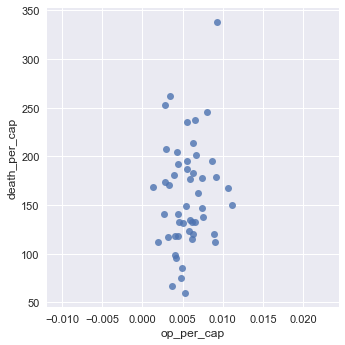

In [170]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")

scatter = sns.lmplot(x = 'op_per_cap', y = 'death_per_cap', 
                data = state, fit_reg=False)


Surprisingly, death_per_cap and opioid_per_cap not not as strongly related as I expected. Some states with high overdose death rates are not necessarily the states giving out the opioids the most.  

#### Male vs Female

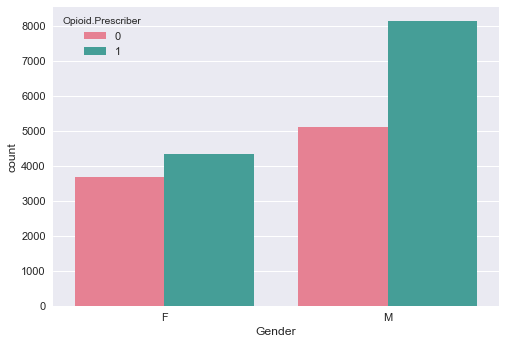

In [171]:
tmp = pd.concat([X, y], axis=1)
sns.countplot(x="Gender", hue="Opioid.Prescriber", data=tmp, palette=sns.husl_palette(2))
plt.show()

Among prefessionals with NPI, females are more likely to prescribe opioids

The average opioid prescription of female opioid prescriber: 133.92
The average opioid prescription of male opioid prescriber: 197.66


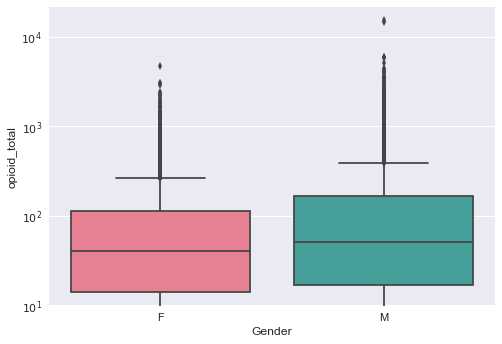

In [172]:
female = tmp[tmp['Gender'] == 'F'][tmp['opioid_total'] > 0]
female_total = female['opioid_total'].sum(axis=0)
male = tmp[tmp['Gender']=='M'][tmp['opioid_total'] > 0]
male_total = male['opioid_total'].sum(axis=0)

print('The average opioid prescription of female opioid prescriber: {:.2f}'.format(female_total / female.shape[0]))
print('The average opioid prescription of male opioid prescriber: {:.2f}'.format(male_total / male.shape[0]))

pos_prescribers = tmp[tmp['Opioid.Prescriber'] == 1]
ax = sns.boxplot(x = 'Gender', y = 'opioid_total', data = pos_prescribers, palette=sns.husl_palette(2))
ax.set_yscale("log", nonposy='clip')
#ax.set_ylim(ymin=0.)
plt.show()

Among opioid prescribers, males tend to prescribe larger quantity of opiates. Note the y axis is log-scaled. The majority of prescribers prescribe mostly moderate amounts, some outliers tend to go overfew hundreds prescription during the given period. Not few male prescribers prescribed over 10,000 opioids. 

In [173]:
toomany = tmp[tmp['opioid_total'] > 10000]
toomany

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,AMITRIPTYLINE.HCL,AMLODIPINE.BESYLATE,AMLODIPINE.BESYLATE.BENAZEPRIL,AMOX.TR.POTASSIUM.CLAVULANATE,AMOXICILLIN,AMPHETAMINE.SALT.COMBO,ATENOLOL,ATORVASTATIN.CALCIUM,AVODART,AZITHROMYCIN,BACLOFEN,BD.ULTRA.FINE.PEN.NEEDLE,BENAZEPRIL.HCL,BENICAR,BENICAR.HCT,BENZTROPINE.MESYLATE,BISOPROLOL.HYDROCHLOROTHIAZIDE,BRIMONIDINE.TARTRATE,BUMETANIDE,BUPROPION.HCL.SR,BUPROPION.XL,BUSPIRONE.HCL,BYSTOLIC,CARBAMAZEPINE,CARBIDOPA.LEVODOPA,CARISOPRODOL,CARTIA.XT,CARVEDILOL,CEFUROXIME,CELEBREX,CEPHALEXIN,CHLORHEXIDINE.GLUCONATE,CHLORTHALIDONE,CILOSTAZOL,CIPROFLOXACIN.HCL,CITALOPRAM.HBR,CLINDAMYCIN.HCL,CLOBETASOL.PROPIONATE,CLONAZEPAM,CLONIDINE.HCL,CLOPIDOGREL,CLOTRIMAZOLE.BETAMETHASONE,COLCRYS,COMBIVENT.RESPIMAT,CRESTOR,CYCLOBENZAPRINE.HCL,DEXILANT,DIAZEPAM,DICLOFENAC.SODIUM,DICYCLOMINE.HCL,DIGOX,DIGOXIN,DILTIAZEM.24HR.CD,DILTIAZEM.24HR.ER,DILTIAZEM.ER,DILTIAZEM.HCL,DIOVAN,DIPHENOXYLATE.ATROPINE,DIVALPROEX.SODIUM,DIVALPROEX.SODIUM.ER,DONEPEZIL.HCL,DORZOLAMIDE.TIMOLOL,DOXAZOSIN.MESYLATE,DOXEPIN.HCL,DOXYCYCLINE.HYCLATE,DULOXETINE.HCL,ENALAPRIL.MALEATE,ESCITALOPRAM.OXALATE,ESTRADIOL,EXELON,FAMOTIDINE,FELODIPINE.ER,FENOFIBRATE,FINASTERIDE,FLOVENT.HFA,FLUCONAZOLE,FLUOXETINE.HCL,FLUTICASONE.PROPIONATE,FUROSEMIDE,GABAPENTIN,GEMFIBROZIL,GLIMEPIRIDE,GLIPIZIDE,GLIPIZIDE.ER,GLIPIZIDE.XL,GLYBURIDE,HALOPERIDOL,HUMALOG,HYDRALAZINE.HCL,HYDROCHLOROTHIAZIDE,HYDROCORTISONE,HYDROXYZINE.HCL,IBANDRONATE.SODIUM,IBUPROFEN,INSULIN.SYRINGE,IPRATROPIUM.BROMIDE,IRBESARTAN,ISOSORBIDE.MONONITRATE.ER,JANTOVEN,JANUMET,JANUVIA,KETOCONAZOLE,KLOR.CON.10,KLOR.CON.M10,KLOR.CON.M20,LABETALOL.HCL,LACTULOSE,LAMOTRIGINE,LANSOPRAZOLE,LANTUS,LANTUS.SOLOSTAR,LATANOPROST,LEVEMIR,LEVEMIR.FLEXPEN,LEVETIRACETAM,LEVOFLOXACIN,LEVOTHYROXINE.SODIUM,LIDOCAINE,LISINOPRIL,LISINOPRIL.HYDROCHLOROTHIAZIDE,LITHIUM.CARBONATE,LORAZEPAM,LOSARTAN.HYDROCHLOROTHIAZIDE,LOSARTAN.POTASSIUM,LOVASTATIN,LOVAZA,LUMIGAN,LYRICA,MECLIZINE.HCL,MELOXICAM,METFORMIN.HCL,METFORMIN.HCL.ER,METHOCARBAMOL,METHOTREXATE,METHYLPREDNISOLONE,METOCLOPRAMIDE.HCL,METOLAZONE,METOPROLOL.SUCCINATE,METOPROLOL.TARTRATE,METRONIDAZOLE,MIRTAZAPINE,MONTELUKAST.SODIUM,MUPIROCIN,NABUMETONE,NAMENDA,NAMENDA.XR,NAPROXEN,NASONEX,NEXIUM,NIACIN.ER,NIFEDICAL.XL,NIFEDIPINE.ER,NITROFURANTOIN.MONO.MACRO,NITROSTAT,NORTRIPTYLINE.HCL,NOVOLOG,NOVOLOG.FLEXPEN,NYSTATIN,OLANZAPINE,OMEPRAZOLE,ONDANSETRON.HCL,ONDANSETRON.ODT,ONGLYZA,OXCARBAZEPINE,PANTOPRAZOLE.SODIUM,PAROXETINE.HCL,PHENOBARBITAL,PHENYTOIN.SODIUM.EXTENDED,PIOGLITAZONE.HCL,POLYETHYLENE.GLYCOL.3350,POTASSIUM.CHLORIDE,PRADAXA,PRAMIPEXOLE.DIHYDROCHLORIDE,PRAVASTATIN.SODIUM,PREDNISONE,PREMARIN,PRIMIDONE,PROAIR.HFA,PROMETHAZINE.HCL,PROPRANOLOL.HCL,PROPRANOLOL.HCL.ER,QUETIAPINE.FUMARATE,QUINAPRIL.HCL,RALOXIFENE.HCL,RAMIPRIL,RANEXA,RANITIDINE.HCL,RESTASIS,RISPERIDONE,ROPINIROLE.HCL,SEROQUEL.XR,SERTRALINE.HCL,SIMVASTATIN,SOTALOL,SPIRIVA,SPIRONOLACTONE,SUCRALFATE,SULFAMETHOXAZOLE.TRIMETHOPRIM,SUMATRIPTAN.SUCCINATE,SYMBICORT,SYNTHROID,TAMSULOSIN.HCL,TEMAZEPAM,TERAZOSIN.HCL,TIMOLOL.MALEATE,TIZANIDINE.HCL,TOLTERODINE.TARTRATE.ER,TOPIRAMATE,TOPROL.XL,TORSEMIDE,TRAVATAN.Z,TRAZODONE.HCL,TRIAMCINOLONE.ACETONIDE,TRIAMTERENE.HYDROCHLOROTHIAZID,VALACYCLOVIR,VALSARTAN,VALSARTAN.HYDROCHLOROTHIAZIDE,VENLAFAXINE.HCL,VENLAFAXINE.HCL.ER,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,DO,DPM,Dental,MD,NP,OD,PA,Other,non_opioid_total,Opioid.Prescriber,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,OXYCODONE.HCL,TRAMADOL.HCL,ACETAMINOPHEN.CODEINE,OXYCODONE.ACETAMINOPHEN,MORPHINE.SULFATE.ER,OXYCONTIN,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,opioid_total
14265,M,FL,Interventional Pain Management,0,0,0,0,0,0,300,0,99,0,0,0,0,0,0,0,0,0,353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,955,0,0,0,36,32,0,0,0,0,0,0,0,131,0,0,0,0,0,0,501,0,184,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193,0,0,0,0,0,0,0,0,0,0,0,0,12,1805,0,0,0,0,0,0,0,0,0

In [174]:
toomany['opioid_total'] / toomany['non_opioid_total']

14265   2.3575
9936    1.1450
dtype: float64

Two male MDs in pain medicine and rehab, respectively, prescribed that many opioids. The doc in FL prescribed more five opiates drugs than the rest of non-opiates 245 drugs. 
Let's investigate the ratio of opioids to non-opioids of these docs are in normal range.   

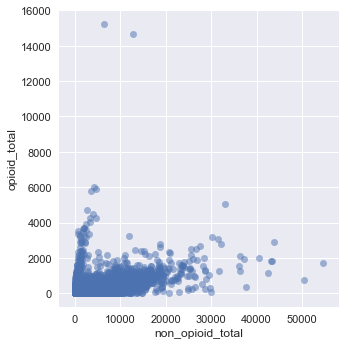

In [371]:
tmp['high_ratio'] = tmp['opioid_total'] / tmp['non_opioid_total'] > 1
ax = sns.lmplot(x = 'non_opioid_total', y = 'opioid_total', 
                data = tmp, fit_reg=False,
               # hue = 'high_ratio',
                palette=sns.husl_palette(2),
                scatter_kws={'alpha':0.5}
               )

(0, 7000)

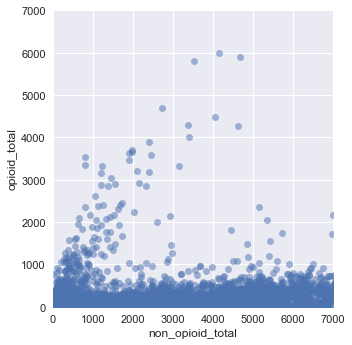

In [377]:
ax = sns.lmplot(x = 'non_opioid_total', y = 'opioid_total', 
                data = tmp, fit_reg=False,
               # hue = 'high_ratio',
                palette=sns.husl_palette(2),
                scatter_kws={'alpha':0.5}
               )
plt.xlim([0, 7000])
plt.ylim([0, 7000])

We can easily recognize two outlier data points with more than 12,000 opioids prescriptions. Note that the most of prefessionals in the dataset prescribe less than 20,000 non-opioids drugs and less than 2,000 opioids drugs. While the ratio of opioids prescription to non-opioids prescription varies, we can kind of track the subsegment group with high opioids prescription rate.

In [178]:
high_ratio = tmp[tmp['high_ratio'] > .25]
high_ratio_specialty = high_ratio['Specialty'].value_counts()
high_ratio_specialty.ix[:10]

Physician Assistant                                               380
Emergency Medicine                                                376
Orthopedic Surgery                                                347
General Surgery                                                   256
Nurse Practitioner                                                191
Dentist                                                           163
Student in an Organized Health Care Education/Training Program     83
Physical Medicine and Rehabilitation                               71
Anesthesiology                                                     55
Internal Medicine                                                  52
Name: Specialty, dtype: int64

Many sub-specialty groups that involve surgery are listed high in the above list. That pain management, anesthesiology, and emergency medicine are listed high is as expected. A bit surprising is that physicians assistant in the high ratio group  are prescribing opioids as many as emergency medicine, and nurse practitioners are prescribing opioids as much as dentists. It would have been more helpful if the dataset specifically which specialty department these PAs and NPs work for. 

In [179]:
specialties = tmp[tmp['Opioid.Prescriber']==1]
sorted_spec = specialties['Specialty'].value_counts(ascending=False)
sorted_spec[:10] 

Family Practice                                                   2253
Internal Medicine                                                 2059
Nurse Practitioner                                                1139
Physician Assistant                                               1078
Dentist                                                            906
Emergency Medicine                                                 889
Orthopedic Surgery                                                 489
General Surgery                                                    374
Urology                                                            217
Student in an Organized Health Care Education/Training Program     212
Name: Specialty, dtype: int64

In [180]:
#high_ratio['State'].value_counts()

top10 = sorted_spec.index[:10]
low_od = ['MO', 'AR', 'AL', 'SD', 'ND']
high_od = ['AK', 'NH', 'UT', 'NM', 'CT']
state_interest = low_od + high_od
tmp_cross = pd.crosstab(tmp['State'], tmp['Specialty'])
tmp_cross_top10_small = tmp_cross.ix[state_interest, top10]
tmp_cross_top10_small


,Family Practice,Internal Medicine,Nurse Practitioner,Physician Assistant,Dentist,Emergency Medicine,Orthopedic Surgery,General Surgery,Urology,Student in an Organized Health Care Education/Training Program
State,,,,,,,,,,
MO,44,46,46,12,58,21,8,7,1,10
AR,37,17,19,7,26,5,2,4,4,6
AL,42,36,39,5,27,12,9,10,3,12
SD,6,3,8,11,2,0,1,1,1,1
ND,9,6,9,2,5,5,1,1,0,0
AK,12,1,1,3,1,0,3,1,1,0
NH,7,13,19,9,9,1,6,0,0,4
UT,12,11,10,22,14,11,8,5,4,3
NM,25,11,15,6,12,8,2,0,1,8


In [181]:
tmp_cross_top10_small['sum'] = tmp_cross_top10_small.sum(axis=1)
for i, c in enumerate(tmp_cross_top10_small.columns):
    tmp_cross_top10_small.ix[:, i] = tmp_cross_top10_small.ix[:, i] / tmp_cross_top10_small['sum']

pd.options.display.float_format = '{:,.4f}'.format
tmp_cross_top10_small.drop('sum', 1)   

,Family Practice,Internal Medicine,Nurse Practitioner,Physician Assistant,Dentist,Emergency Medicine,Orthopedic Surgery,General Surgery,Urology,Student in an Organized Health Care Education/Training Program
State,,,,,,,,,,
MO,0.1739,0.1818,0.1818,0.0474,0.2292,0.0830,0.0316,0.0277,0.0040,0.0395
AR,0.2913,0.1339,0.1496,0.0551,0.2047,0.0394,0.0157,0.0315,0.0315,0.0472
AL,0.2154,0.1846,0.2000,0.0256,0.1385,0.0615,0.0462,0.0513,0.0154,0.0615
SD,0.1765,0.0882,0.2353,0.3235,0.0588,0.0000,0.0294,0.0294,0.0294,0.0294
ND,0.2368,0.1579,0.2368,0.0526,0.1316,0.1316,0.0263,0.0263,0.0000,0.0000
AK,0.5217,0.0435,0.0435,0.1304,0.0435,0.0000,0.1304,0.0435,0.0435,0.0000
NH,0.1029,0.1912,0.2794,0.1324,0.1324,0.0147,0.0882,0.0000,0.0000,0.0588
UT,0.1200,0.1100,0.1000,0.2200,0.1400,0.1100,0.0800,0.0500,0.0400,0.0300
NM,0.2841,0.1250,0.1705,0.0682,0.1364,0.0909,0.0227,0.0000,0.0114,0.0909


### Looking for correlations

In [336]:
tmp = pd.concat([X, y], axis=1)
nonop_names = np.setdiff1d(tmp.columns, opioids_columns)
categorical = list(credentials_vars.columns) + ['Specialty', 'State', 'Gender']
numerical = np.setdiff1d(nonop_names, categorical)
transformed = tmp.ix[:, numerical]


In [337]:
from scipy.stats import boxcox
def boxcox_transform(df):
    transformed = np.array(df.copy() + .01)
    param = []
    for i in range(df.shape[1]):
        transformed[:, i], p = boxcox(transformed[:, i])
        param.append(p)
    return transformed, param

In [338]:
boxcox_transformed_data, param = boxcox_transform(transformed)
boxcox_transformed_data = pd.DataFrame(data=boxcox_transformed_data, index = tmp.index, columns = numerical)

In [339]:
boxcox_transformed_data.corr()['opioid_total'].sort_values(ascending=False)

opioid_total                      1.0000
Opioid.Prescriber                 0.8341
GABAPENTIN                        0.4773
MELOXICAM                         0.4712
TAMSULOSIN.HCL                    0.4553
ALLOPURINOL                       0.4483
CIPROFLOXACIN.HCL                 0.4309
METFORMIN.HCL                     0.4266
LYRICA                            0.4248
PROAIR.HFA                        0.4214
LEVOTHYROXINE.SODIUM              0.4174
ALPRAZOLAM                        0.4171
CYCLOBENZAPRINE.HCL               0.4145
ALENDRONATE.SODIUM                0.4124
ZOLPIDEM.TARTRATE                 0.4098
FLUTICASONE.PROPIONATE            0.4077
WARFARIN.SODIUM                   0.4039
POTASSIUM.CHLORIDE                0.4037
LISINOPRIL.HYDROCHLOROTHIAZIDE    0.4007
OMEPRAZOLE                        0.4000
HYDROCHLOROTHIAZIDE               0.3996
PREDNISONE                        0.3953
ATENOLOL                          0.3947
AZITHROMYCIN                      0.3944
RANITIDINE.HCL  

## Data Preparation

In [112]:
def load_dataset():
    opioids = pd.read_csv("dataset/opioids.csv")
    overdose = pd.read_csv("dataset/overdoses.csv", thousands=',')
    prescriber = pd.read_csv("dataset/prescriber-info.csv")
    return opioids, overdose, prescriber


def num_cat_names(prescriber):
    credentials_vars = utils.clean_creds(prescriber[ 'Credentials' ])
    cat_attribs = [ 'Gender', 'State', 'Specialty' ]
    y = [ 'Opioid.Prescriber' ]
    not_used = [ 'NPI', 'Credentials' ]
    num_attribs = np.setdiff1d(prescriber.columns, cat_attribs + y + not_used)
    nonop_names = np.setdiff1d(num_attribs, utils.opioids_columns)
    op_names = num_attribs[ [ c in utils.opioids_columns for _, c in enumerate(num_attribs) ] ]
    return y, op_names, nonop_names, cat_attribs, credentials_vars

In [113]:
import utils
import pandas as pd
import numpy as np
opioids, overdose, prescriber = load_dataset()
y, op_names, nonop_names, cat_attribs, credentials_vars = num_cat_names(prescriber)

In [114]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
def boxcox_transform(df):
    transformed = df.copy()
    param = []
    for i in range(df.shape[1]):
        #print(transformed.columns[i])
        col = transformed.ix[:, i].astype(float) + .01
        transformed.ix[:, i], p = boxcox(col)
        param.append(p)
    return transformed, param

In [115]:

def prepare_num(prescriber, op_names, nonop_names, add_total=True):
    op = prescriber.ix[ :, op_names ]
    nonop = prescriber.ix[ :, nonop_names ]

    if add_total:
        op[ 'op_total' ] = op.sum(axis=1)
        nonop[ 'nonop_total' ] = nonop.sum(axis=1)

    num = pd.concat([ op, nonop ], axis=1)
    transformed, param = boxcox_transform(num)
    scaler = MinMaxScaler()
    transformed = scaler.fit_transform(transformed)
    transformed = pd.DataFrame(data=transformed, index=num.index, columns=num.columns)

    return op, nonop, transformed, param


In [116]:
op, nonop, transformed, param = prepare_num(prescriber, op_names, nonop_names, add_total=True)

In [117]:
transformed.corr()['op_total'].sort_values(ascending=False)

op_total                          1.000000
HYDROCODONE.ACETAMINOPHEN         0.824758
TRAMADOL.HCL                      0.657925
OXYCODONE.ACETAMINOPHEN           0.546828
GABAPENTIN                        0.478801
MELOXICAM                         0.469355
TAMSULOSIN.HCL                    0.456060
ALLOPURINOL                       0.448782
CIPROFLOXACIN.HCL                 0.431529
METFORMIN.HCL                     0.426224
OXYCODONE.HCL                     0.424802
LYRICA                            0.424466
PROAIR.HFA                        0.418682
LEVOTHYROXINE.SODIUM              0.418259
ALPRAZOLAM                        0.417808
CYCLOBENZAPRINE.HCL               0.415091
ZOLPIDEM.TARTRATE                 0.411641
ALENDRONATE.SODIUM                0.410524
FLUTICASONE.PROPIONATE            0.408416
POTASSIUM.CHLORIDE                0.401352
WARFARIN.SODIUM                   0.400577
OMEPRAZOLE                        0.398918
HYDROCHLOROTHIAZIDE               0.396703
LISINOPRIL.

In [118]:
transformed

,ACETAMINOPHEN.CODEINE,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,nonop_total
0,0.000000,0.000000,0.779991,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.246305
1,0.000000,0.000000,0.894045,0.0,0.0,0.0,0.999999,0.000000,0.000000,0.993159,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.989481,0.552755
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.987113,0.446505
3,0.999997,0.000000,0.000000,0.0,0.0,1.0,1.000000,0.999980,0.000000,0.998208,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.562882
4,0.000000,0.999995,0.794437,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.974187,0.999993,0.000000,0.0,0.000000,0.379238
5,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.991818,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.000000,0.000000,0.799188,0.0,0.0,0.0,0.000000,0.999992,0.000000,0.992724,...,0.00000,0.000000,0.000000,0.0,0.988639,0.000000,0.999816,0.0,0.989997,0.644140
7,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.418497
8,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.395881
9,0.000000,0.999996,0.000000,0.0,0.0,0.0,0.000000,0.999975,0.999985,0.000000,...,0.00000,0.000000,0.000000,0.0,0.986198,0.000000,0.999859,0.0,0.000000,0.618898
